# Spam SMS Dectection

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pjpun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get Sms Dataset

In [2]:
sms = pd.read_csv('Spam SMS Collection', sep='\t', names=['label','message'])

In [3]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.shape

(5572, 2)

In [5]:
sms.drop_duplicates(inplace=True)

In [6]:
sms.reset_index(drop=True, inplace=True)

In [7]:
sms.shape

(5169, 2)

In [8]:
sms['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

In [9]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

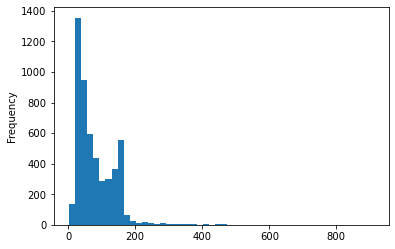

In [10]:
sms['length'].plot(bins=50, kind='hist')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

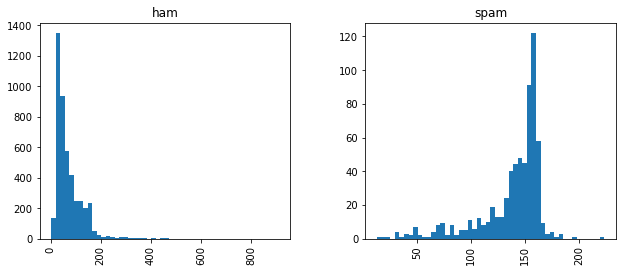

In [11]:
sms.hist(column='length', by='label', bins=50,figsize=(10,4))

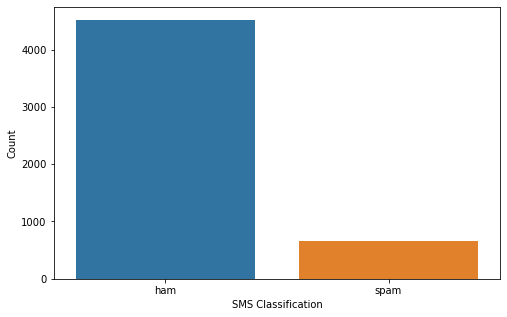

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

## Cleaning the messages

In [13]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [14]:
# Get all the ham and spam emails
ham_msg = sms[sms.label =='ham']
spam_msg = sms[sms.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

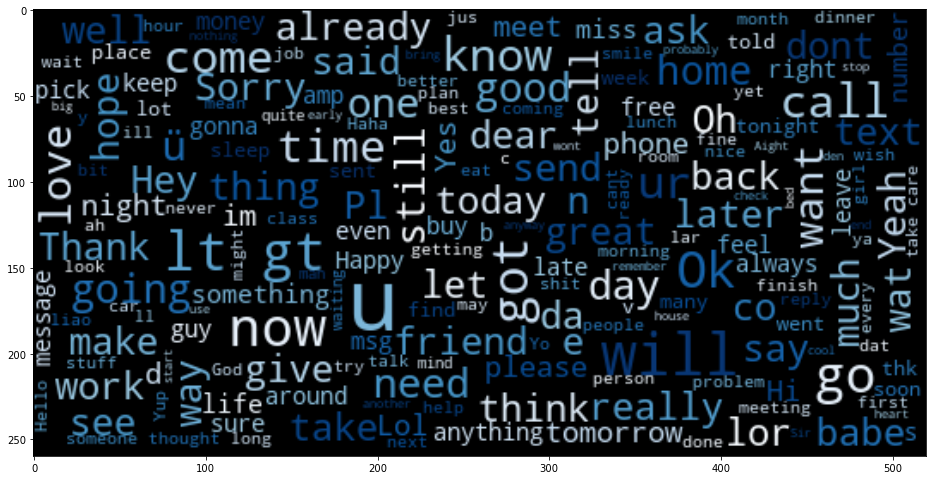

In [15]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.show()

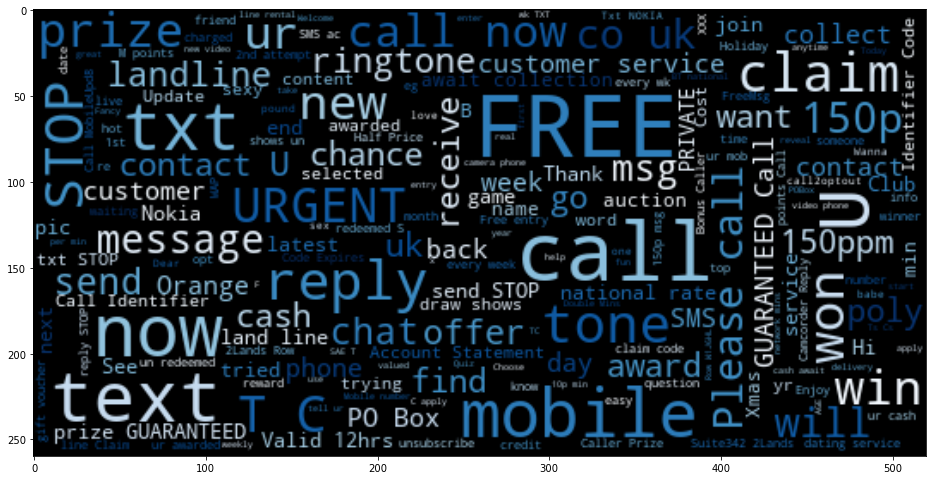

In [16]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.show()

## Creating the Bag of Words model

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

## Extracting dependent variable from the dataset

In [18]:
y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

In [19]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

## train_test_split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Cheking alpha Naive Bayes Classifier

In [21]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

C:\Users\pjpun\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Accuracy score for alpha=0.0 is: 97.29%
Accuracy score for alpha=0.1 is: 97.78%
Accuracy score for alpha=0.2 is: 97.97%
Accuracy score for alpha=0.3 is: 97.97%
Accuracy score for alpha=0.4 is: 97.97%
Accuracy score for alpha=0.5 is: 97.97%
Accuracy score for alpha=0.6 is: 97.97%
Accuracy score for alpha=0.7 is: 97.97%
Accuracy score for alpha=0.8 is: 97.87%
Accuracy score for alpha=0.9 is: 97.87%
Accuracy score for alpha=1.0 is: 97.68%
--------------------------------------------
The best accuracy is 97.97% with alpha value as 0.2


## Fitting Naive Bayes to the Training set

In [22]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

## Predicting the Test set results

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

## Accuracy Score

In [25]:
acc_s = accuracy_score(y_test, y_pred)*100

In [26]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 97.97 %


# Prediction

In [27]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [28]:
result = ['this is a SPAM!','this is a normal message.']

In [30]:
msg = "[Update] Congratulations Nile Yogesh, You account is activated for investment in Stocks. Click to invest now: "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

this is a SPAM!


In [31]:
msg = "Your Stock broker FALANA BROKING LIMITED reported your fund balance Rs.1500.5 & securities balance 0.0 as on end of MAY-20 . Balances do not cover your bank, DP & PMS balance with broking entity. Check details at YOGESHNILE.WORK4U@GMAIL.COM. If email Id not correct, kindly update with your broker."

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

this is a normal message.


In [35]:
msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

this is a SPAM!
